<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center> <font color= #004A94> <font size = 6> Lic. Ingeniería Financiera </font> <br> <br> <font color= #047CFB> <font size = 4>I.F. María Fernanda Pinedo Talango - if705971@iteso.mx </font>

<center><font color= #004A94> <font size = 6> Microestructura y Sistemas de Trading </font> <br> <br>

<center><font color=#42c29b><font size=5> Laboratorio 1: Trading manual </font> <br> <br>

<center> <font color= #047CFB> <font size = 4> Primavera 2020 </font>  |  <font color= #047CFB> <font size = 4> Repositorio: <a href='https://github.com/'>https://github.com/ferpinedot/LAB_1_MFPT</a></font>

In [1]:
from oandapyV20 import API
import ta as ta
import pandas as pd
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
import oandapyV20.endpoints.instruments as instruments
import matplotlib.pyplot as plt

In [3]:
# Descarga de datos 
oanda_day_align = 16                       # Day Align
oanda_timezone = "America/Mexico_City"    # Time Align
oanda_id = '101-011-13246466-003'                       # Account Id
oanda_type = "practice"               # Account type
oanda_currency = "USD_MXN"                # Instrument
oanda_gran = "M5"                     # Granularity of veils (Minutes 5)

# Token for OANDA
OA_Ak = '53e30fadde18a9b9153879673228a860-5577569e0db89960b0e4e5ad8e0b761d'

api = API(access_token=OA_Ak)


F_inicio = '2020-03-15'
F_final = '2020-03-23'

params = {"granularity": oanda_gran, "price": "M", "dailyAlignment": oanda_day_align,
          "alignmentTimezone": oanda_timezone, "from": F_inicio, "to": F_final}

OA_Req = instruments.InstrumentsCandles(instrument = oanda_currency, params=params)
OA_Hist = api.request(OA_Req)

In [4]:
list_a = []
for i in range(len(OA_Hist['candles'])-1):
        list_a.append({'TimeStamp': OA_Hist['candles'][i]['time'],
                       'Open': OA_Hist['candles'][i]['mid']['o'],
                       'High': OA_Hist['candles'][i]['mid']['h'],
                       'Low': OA_Hist['candles'][i]['mid']['l'],
                       'Close': OA_Hist['candles'][i]['mid']['c']})

In [5]:
# Convierte los datos a dataframe
pd_hist_data = pd.DataFrame(list_a) 

In [6]:
pd_hist_data

,TimeStamp,Open,High,Low,Close
0,2020-03-15T21:00:00.000000000Z,22.12340,22.12370,22.02407,22.02602
1,2020-03-15T21:05:00.000000000Z,22.02500,22.02500,21.84316,21.86222
2,2020-03-15T21:10:00.000000000Z,21.86064,21.86273,21.77107,21.77282
3,2020-03-15T21:15:00.000000000Z,21.77145,21.77202,21.75389,21.75652
4,2020-03-15T21:20:00.000000000Z,21.75517,21.75517,21.42888,21.46090
...,...,...,...,...,...
1515,2020-03-23T03:30:00.000000000Z,24.73948,24.74578,24.73932,24.74166
1516,2020-03-23T03:35:00.000000000Z,24.74180,24.75376,24.73891,24.74557
1517,2020-03-23T03:40:00.000000000Z,24.74557,24.75588,24.74299,24.74318
1518,2020-03-23T03:45:00.000000000Z,24.74315,24.74634,24.74046,24.74339


In [7]:
# Convertir a dataFrame
pd_hist_data = pd.DataFrame(list_a) 

# Nombrar las columnas
pd_hist_data = pd_hist_data[['TimeStamp', 'Open', 'High', 'Low', 'Close']]  

#Convertir datos a tiempo
pd_hist_data['TimeStamp'] = pd.to_datetime(pd_hist_data['TimeStamp'])

#Convertir datos a numéricos
pd_hist_data['Open'] = pd.to_numeric(pd_hist_data['Open'])  
pd_hist_data['High'] = pd.to_numeric(pd_hist_data['High'])  
pd_hist_data['Low'] = pd.to_numeric(pd_hist_data['Low'])  
pd_hist_data['Close'] = pd.to_numeric(pd_hist_data['Close']) 


df_Precios = pd_hist_data  

In [8]:
# Parámetros de inicio

spot_price =  df_Precios['Close'][len(df_Precios) - 1]

# Análisis técnico

El análisis técnico es el estudio de los mercados financieros que se basa en datos, gráficas, patrones de precios y tendencias de las cotizaciones para poder elaborar una estrategia y llevarla a cabo por medio de traders, para obtener beneficios de los cambios en el mercado.
Para ello, se hace uso de varios indicadores, de los cuales existen 4 principales clasificaciones:
* Tendencia:
Los indicadores de tendencia te indican en qué dirección se está moviendo el mercado y si -valga la redundancia- existe una tendencia. A veces se les llama osciladores porque suelen moverse entre valores altos y bajos como con ondas.

* Momentum: 
Estos indicadores te ayudan a saber qué tan fuertes están siendo estas tendencias y si ocurrirá un movimiento contrario de la misma. Como por ejemplo, si está a la alza y probablemente vaya a bajar o vice-versa.

* Volumen:
Indicadores de volumen te indican cómo el volumen va cambiando a través del tiempo, indicando así qué tan fuerte o significativo es el cambio de precios y en qué cantidad afecta.

* Volatilidad
Los indicadores de volatilidad mencionan cuánto han cambiado los precios a través de un período dado. Mientras mayor sea la volatilidad, más rápido cambiarán los precios. 

# Indicadores 

## Bandas Bollinger

La Bandas de Bollinger son parte de los indicadores de volatilidad. Consisten en dos bandas, una superior y una inferior, que rodean la línea de precios, junto con una línea en medio que indica el promedio de los mismos.
Para interpretar este indicador, se pueden tomar en cuenta dos cosas, la primera, es el grosor o la distancia entre la banda superior y la banda inferior, mientras más corta sea la distancia, quiere decir que el mercado se encuentra tranquilo, y mientras más grande sea la distancia, quiere decir que el mercado se encuentra inquieto.
Al momento de la toma de decisiones, lo otro que se debe de tomar en cuenta, es que cuando el precio toca o sobrepasa la banda superior, normalmente se espera que rebote y al menos regrese a la línea promedio, indicando una acción de venta, ya que se espera que el precio baje. En el caso de que el precio toque o rompa la banda inferior, igualmente se espera que rebote y suba a la banda promedio, por lo que indicaría una acción de compra, ya que se espera que el precio suba.

In [9]:
# Variable del indicador 
indicator_bb = ta.volatility.BollingerBands(df_Precios['Close'], n=20, ndev=2)

# Banda promedio
df_Precios['bb_mavg'] = indicator_bb.bollinger_mavg()

# Banda superior
df_Precios['bb_bbh'] = indicator_bb.bollinger_hband()

# Banda inferior
df_Precios['bb_bbl'] = indicator_bb.bollinger_lband()

DataFrame con los datos importantes incluyendo el indicador mencionado anteriormente

In [10]:
# Visualización de los últimos 5 precios
df_Precios.tail(5)

,TimeStamp,Open,High,Low,Close,bb_mavg,bb_bbh,bb_bbl
1515,2020-03-23 03:30:00+00:00,24.73948,24.74578,24.73932,24.74166,24.758192,24.811525,24.704859
1516,2020-03-23 03:35:00+00:00,24.74180,24.75376,24.73891,24.74557,24.756538,24.809279,24.703797
1517,2020-03-23 03:40:00+00:00,24.74557,24.75588,24.74299,24.74318,24.754722,24.806671,24.702773
1518,2020-03-23 03:45:00+00:00,24.74315,24.74634,24.74046,24.74339,24.753079,24.804275,24.701884
1519,2020-03-23 03:50:00+00:00,24.74339,24.74819,24.73994,24.74610,24.751418,24.801238,24.701599


In [11]:
# Toma de decisiones

if df_Precios['Close'].iloc[-1] > df_Precios['bb_bbh'].iloc[-1]:
    print('sell')
elif df_Precios['Close'].iloc[-1] == df_Precios['bb_bbh'].iloc[-1]:
    print('sell')
elif df_Precios['Close'].iloc[-1] < df_Precios['bb_bbl'].iloc[-1]:
    print('buy')
elif df_Precios['Close'].iloc[-1] == df_Precios['bb_bbl'].iloc[-1]:
    print('buy')
else:
    print('sin movimientos')

sin movimientos


In [12]:
df_Precios['Close'].iloc[-1]

24.7461

### Gráfica de todo el historial de valores

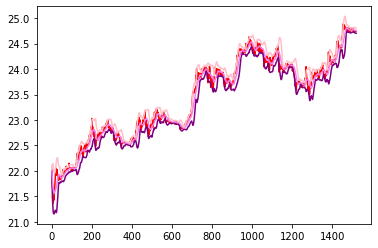

In [13]:
plt.plot(list(df_Precios['Close']), c= 'red')
plt.plot(list(df_Precios['bb_bbl']), c= 'purple')
plt.plot(list(df_Precios['bb_mavg']), c= 'violet')
plt.plot(list(df_Precios['bb_bbh']), c= 'pink')
plt.show()

In [14]:
df_Precios['Close'].iloc[-150:-1]

1370    23.89428
1371    23.91326
1372    23.89390
1373    23.91717
1374    23.93555
          ...   
1514    24.73998
1515    24.74166
1516    24.74557
1517    24.74318
1518    24.74339
Name: Close, Length: 149, dtype: float64

### Gráfica de los últimos 150 valores

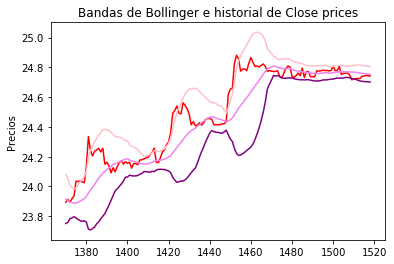

In [15]:
plt.plot(df_Precios['Close'].iloc[-150:-1], color = 'red')
plt.plot(df_Precios['bb_bbl'].iloc[-150:-1], color = 'purple')
plt.plot(df_Precios['bb_mavg'].iloc[-150:-1], color = 'violet')
plt.plot(df_Precios['bb_bbh'].iloc[-150:-1], color = 'pink')
plt.title('Bandas de Bollinger e historial de Close prices')
plt.xlabel('')
plt.ylabel('Precios')
plt.show()

## Oscilador Estocástico

El indicador estocástico es un indicador momentum, puede ser usado para saber cuando la tendencia podría acabar.
Este indicador ayuda a escoger en qué punto entrar y ya sea comprar, o vender. En este caso los parámetros son otros, cuando el indicador se encuentra usualmente arriba de 80 indica que el mercado tiene sobrecompra, lo que sugiere que los precios bajarán o tendrán una tendencia bajista, por el contrio, cuando las líneas del indicador son menores a 20 indican que el mercado está sobrevendido, lo que sugeriría que los precios subirían o que habría una tendencia alcista.

In [16]:
# Variable del indicador 
indicator_stoch = ta.momentum.StochasticOscillator(df_Precios['High'], df_Precios['Low'], df_Precios['Close'], 14, 3, False)

df_Precios['stoch_close'] = indicator_stoch.stoch()
df_Precios['stoch_signal'] = indicator_stoch.stoch_signal()

DataFrame con los datos importantes incluyendo el indicador mencionado anteriormente

In [17]:
df_Precios.tail(5)

,TimeStamp,Open,High,Low,Close,bb_mavg,bb_bbh,bb_bbl,stoch_close,stoch_signal
1515,2020-03-23 03:30:00+00:00,24.73948,24.74578,24.73932,24.74166,24.758192,24.811525,24.704859,24.010822,18.616841
1516,2020-03-23 03:35:00+00:00,24.74180,24.75376,24.73891,24.74557,24.756538,24.809279,24.703797,27.316537,24.639274
1517,2020-03-23 03:40:00+00:00,24.74557,24.75588,24.74299,24.74318,24.754722,24.806671,24.702773,30.611827,27.313062
1518,2020-03-23 03:45:00+00:00,24.74315,24.74634,24.74046,24.74339,24.753079,24.804275,24.701884,55.899814,37.942726
1519,2020-03-23 03:50:00+00:00,24.74339,24.74819,24.73994,24.74610,24.751418,24.801238,24.701599,65.210485,50.574042


In [18]:
# Parámetros

stoch_up = 80
stoch_down = 20

stoch_level = df_Precios['stoch_close'][len(df_Precios) -1]

In [19]:
stoch_level

65.21048451151336

In [20]:
# Toma de decisiones

if stoch_level > stoch_up:
    print('sell')
elif stoch_level == stoch_up:
    print('sell')
elif stoch_level < stoch_down:
    print('buy')
elif stoch_level == stoch_down:
    print('buy')
else:
    print('sin movimientos')

sin movimientos


### Gráfica de todo el historial de valores

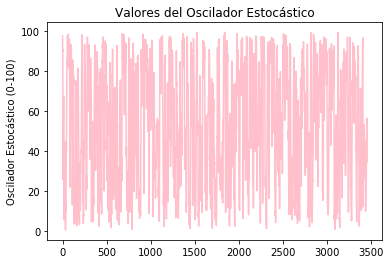

In [25]:
plt.plot(list(df_Precios['stoch_signal']), c= 'pink')
plt.title('Valores del Oscilador Estocástico')
plt.xlabel('')
plt.ylabel('Oscilador Estocástico (0-100)')
plt.show()

In [26]:
df_Precios['stoch_signal'].iloc[-150:-1]

3301    53.882078
3302    57.218331
3303    63.866067
3304    78.379281
3305    88.437888
          ...    
3445    29.190578
3446    38.340663
3447    47.195921
3448    56.345513
3449    43.620330
Name: stoch_signal, Length: 149, dtype: float64

### Gráfica de los últimos 150 valores

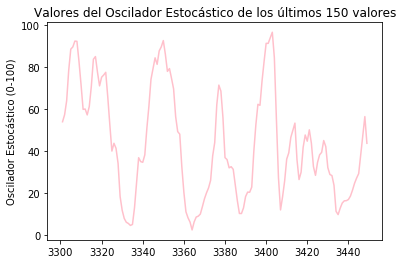

In [27]:
plt.plot(df_Precios['stoch_signal'].iloc[-150:-1], c= 'pink')
plt.title('Valores del Oscilador Estocástico de los últimos 150 valores')
plt.xlabel('')
plt.ylabel('Oscilador Estocástico (0-100)')
plt.show()

## Índice de Fuerza Relativa (RSI)

El indicador de índice de Fuerza Relativa, RSI por sus siglas en inglés (Relative Strength Index) es un indicador momentum. 
El cual indica en un rango del 0 al 100 si, en este caso la divisa esta sobrevendida o sobrecomprada. 
Usualmente cuando el valor de este índice sobrepasa los 70 indica un mercado de sobrecompra, lo que se interpretaría diciendo que es probable que en un período relativamente corto, los precios de la divisa bajarán. 
Sucede lo contrario cuando el indicador está por debajo de 30, lo que indica que existe un mercado de sobreventa, por lo que es conveniente comprar ya que se espera que suban los precios.

In [28]:
# Variable del indicador 
indicator_rsi= ta.momentum.rsi(df_Precios['Close'], 51)
df_Precios['rsi_close'] = ta.momentum.rsi(df_Precios['Close'],51)

DataFrame con los datos importantes incluyendo el indicador mencionado anteriormente

In [29]:
df_Precios.tail(5)

,TimeStamp,Open,High,Low,Close,bb_mavg,bb_bbh,bb_bbl,stoch_close,stoch_signal,rsi_close
3446,2020-03-18 03:30:00+00:00,22.84830,22.86055,22.84694,22.85544,22.863608,22.941027,22.786189,54.356307,38.340663,44.067778
3447,2020-03-18 03:35:00+00:00,22.85554,22.85978,22.85200,22.85583,22.859463,22.928805,22.790121,55.373776,47.195921,44.100138
3448,2020-03-18 03:40:00+00:00,22.85380,22.85606,22.84401,22.84644,22.854772,22.913497,22.796047,59.306455,56.345513,43.482308
3449,2020-03-18 03:45:00+00:00,22.84643,22.84740,22.82490,22.83142,22.851078,22.905782,22.796374,16.180758,43.620330,42.510610
3450,2020-03-18 03:50:00+00:00,22.83144,22.83528,22.83140,22.83474,22.847474,22.896182,22.798766,27.601683,34.362965,42.798808


In [30]:
# Parámetros

rsi_up = 70
rsi_down = 30

rsi_level = df_Precios['rsi_close'][len(df_Precios) - 1]

In [31]:
if rsi_level > rsi_up: 
    print('sell')
elif rsi_level == rsi_up:
    print('sell')
elif rsi_level < rsi_down: 
    print('buy')
elif rsi_level == rsi_down:
    print('buy')
else:
    print('sin movimientos')

sin movimientos


### Gráfica de todo el historial de valores

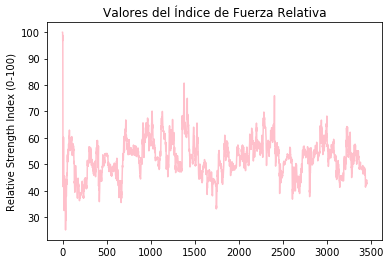

In [32]:
plt.plot(list(df_Precios['rsi_close']), c= 'pink')
plt.title('Valores del Índice de Fuerza Relativa')
plt.xlabel('')
plt.ylabel('Relative Strength Index (0-100)')
plt.show()

In [33]:
df_Precios['rsi_close'].iloc[-150:-1]

3301    51.252238
3302    52.326319
3303    53.991407
3304    53.719404
3305    54.058577
          ...    
3445    43.482169
3446    44.067778
3447    44.100138
3448    43.482308
3449    42.510610
Name: rsi_close, Length: 149, dtype: float64

### Gráfica de los últimos 150 valores

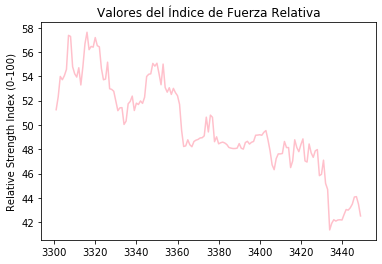

In [34]:
plt.plot(df_Precios['rsi_close'].iloc[-150:-1], c= 'pink')
plt.title('Valores del Índice de Fuerza Relativa')
plt.xlabel('')
plt.ylabel('Relative Strength Index (0-100)')
plt.show()